In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

print("Bibliotecas importadas!")

Bibliotecas importadas!


In [4]:
print("Carregando dados do CIFAR-10...")
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# 1. Normalização
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. One-Hot Encoding
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

# 3. Criar conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.1,  # 10%
    random_state=42
)

print(f"Formato Treino: {X_train.shape}")
print(f"Formato Validação: {X_val.shape}")
print(f"Formato Teste: {X_test.shape}")

Carregando dados do CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Formato Treino: (45000, 32, 32, 3)
Formato Validação: (5000, 32, 32, 3)
Formato Teste: (10000, 32, 32, 3)


In [5]:
def build_model_A():
    model = models.Sequential(name="Modelo_Baseline")

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_A = build_model_A()
model_A.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_Baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def build_model_B():
    model = models.Sequential(name="Modelo_Melhorado")

    # Bloco 1
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization()) # Normaliza os outputs da camada
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25)) # "Desliga" 25% dos neurônios para evitar decorar

    # Bloco 2
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Bloco 3
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Camadas Finais
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5)) # Dropout mais agressivo antes da saída
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Criar e ver o resumo
model_B = build_model_B()
model_B.summary()

Model: "Modelo_Melhorado"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,150,410 (4.39 MB)

 Trainable params: 1,148,938 (4.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [7]:
EPOCHS = 15
BATCH_SIZE = 32

print("--- Treinando Modelo A (Baseline) ---")
history_A = model_A.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val)
)

print("\n--- Treinando Modelo B (Melhorado) ---")
history_B = model_B.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val)
)

print("Treinamento concluído!")

--- Treinando Modelo A (Baseline) ---
Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3457 - loss: 1.7715 - val_accuracy: 0.5422 - val_loss: 1.2901
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5706 - loss: 1.2153 - val_accuracy: 0.5714 - val_loss: 1.2085
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6337 - loss: 1.0410 - val_accuracy: 0.6352 - val_loss: 1.0243
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6717 - loss: 0.9277 - val_accuracy: 0.6572 - val_loss: 0.9891
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7040 - loss: 0.8521 - val_accuracy: 0.6706 - val_loss: 0.9154
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7242 - loss: 0.7825 - val_accuracy: 0.6746 - val_loss: 0.9225
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7471 - loss: 0.7176 - val_accuracy: 0.6868 - val_loss: 0.9161
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/st

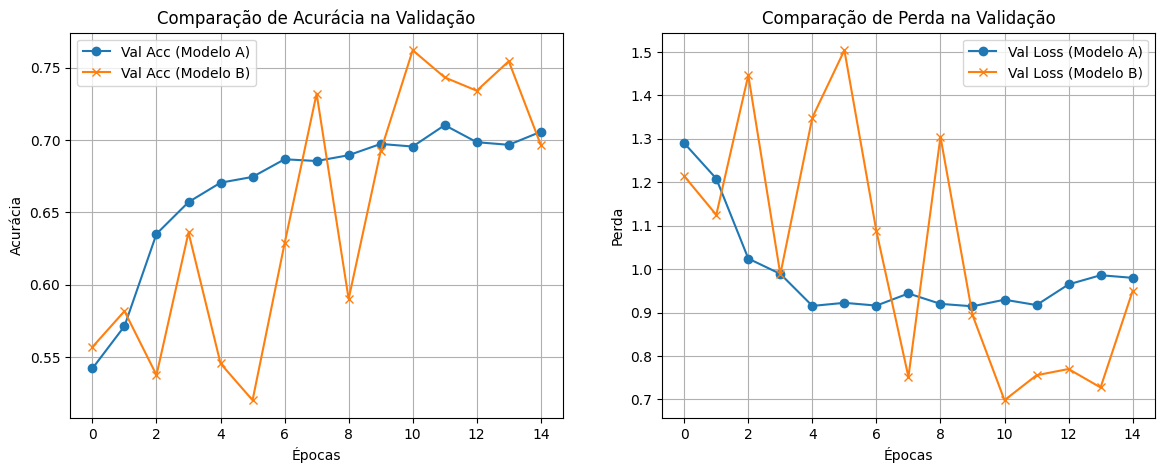

In [8]:
# Criar uma figura com dois subplots (um para acurácia, outro para perda)
plt.figure(figsize=(14, 5))

# Subplot 1: Acurácia
plt.subplot(1, 2, 1)
plt.plot(history_A.history['val_accuracy'], label='Val Acc (Modelo A)', marker='o')
plt.plot(history_B.history['val_accuracy'], label='Val Acc (Modelo B)', marker='x')
plt.title('Comparação de Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Subplot 2: Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(history_A.history['val_loss'], label='Val Loss (Modelo A)', marker='o')
plt.plot(history_B.history['val_loss'], label='Val Loss (Modelo B)', marker='x')
plt.title('Comparação de Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
print("Avaliando no conjunto de teste...")

results_A = model_A.evaluate(X_test, y_test, verbose=0)
results_B = model_B.evaluate(X_test, y_test, verbose=0)

print("\n--- Resultados Finais ---")
print(f"Modelo A (Baseline) - Perda: {results_A[0]:.4f} - Acurácia: {results_A[1]*100:.2f}%")
print(f"Modelo B (Melhorado) - Perda: {results_B[0]:.4f} - Acurácia: {results_B[1]*100:.2f}%")

Avaliando no conjunto de teste...

--- Resultados Finais ---
Modelo A (Baseline) - Perda: 1.0168 - Acurácia: 70.20%
Modelo B (Melhorado) - Perda: 0.9596 - Acurácia: 68.72%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


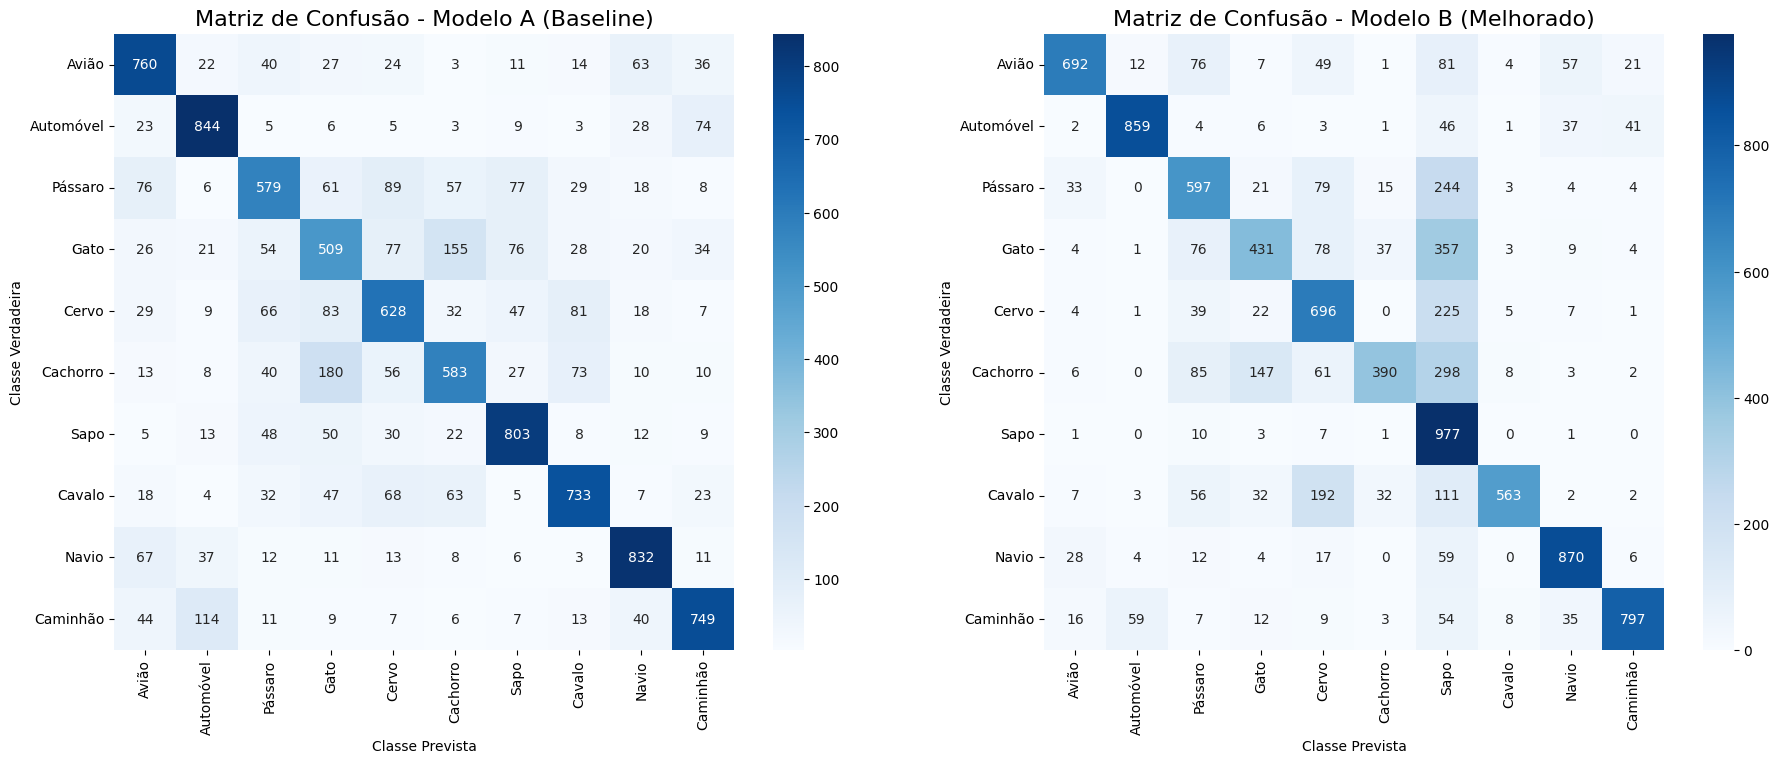

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# 1. Obter as previsões dos modelos no conjunto de teste
y_pred_A = model_A.predict(X_test)
y_pred_B = model_B.predict(X_test)

# 2. Converter as previsões (que são probabilidades) e os rótulos
#    de one-hot para classes (índices de 0 a 9)
y_pred_classes_A = np.argmax(y_pred_A, axis=1)
y_pred_classes_B = np.argmax(y_pred_B, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 3. Definir os nomes das classes (para os eixos do gráfico)
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# 4. Calcular as Matrizes de Confusão
cm_A = confusion_matrix(y_true_classes, y_pred_classes_A)
cm_B = confusion_matrix(y_true_classes, y_pred_classes_B)

# 5. Criar DataFrames do Pandas para o Seaborn (facilita o labeling)
cm_df_A = pd.DataFrame(cm_A, index=class_names, columns=class_names)
cm_df_B = pd.DataFrame(cm_B, index=class_names, columns=class_names)


# 6. Plotar os gráficos lado a lado
plt.figure(figsize=(22, 8))

# Gráfico para Modelo A
plt.subplot(1, 2, 1)
sns.heatmap(cm_df_A, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Modelo A (Baseline)', fontsize=16)
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')

# Gráfico para Modelo B
plt.subplot(1, 2, 2)
sns.heatmap(cm_df_B, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Modelo B (Melhorado)', fontsize=16)
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')

plt.show()